In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib as plt
from scipy import stats
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from __future__ import print_function
import random

In [ ]:
fbdata = pd.read_csv('./fb5.csv', skipinitialspace=True, low_memory=False)
goog= pd.read_csv('./googl5.csv', skipinitialspace=True, low_memory=False)
aapl= pd.read_csv('./aapl5.csv', skipinitialspace=True, low_memory=False)
amzn= pd.read_csv('./amzn5.csv', skipinitialspace=True, low_memory=False)
tesla= pd.read_csv('./tsla5.csv', skipinitialspace=True, low_memory=False)
lll= pd.read_csv('./lll5.csv', skipinitialspace=True, low_memory=False)
rtn=pd.read_csv('./rtn.csv', skipinitialspace=True, low_memory=False)
ng=pd.read_csv('./ng5.csv', skipinitialspace=True, low_memory=False)

In [3]:
fbdata['Date'] = pd.to_datetime(fbdata['Date'])  ##tell pandas its a date
fbdata.set_index('Date', inplace=True)

fbdata['Year'] = fbdata.index.year
fbdata['Month'] = fbdata.index.month

goog['Date'] = pd.to_datetime(goog['Date'])  ##tell pandas its a date
goog.set_index('Date', inplace=True)

goog['Year'] = goog.index.year
goog['Month'] = goog.index.month

aapl['Date'] = pd.to_datetime(aapl['Date'])  ##tell pandas its a date
#aapl['Year'] = aapl.index.year
#aapl['Month'] = aapl.index.month
aapl.set_index('Date', inplace=True)

aapl['Year'] = aapl.index.year
aapl['Month'] = aapl.index.month

amzn['Date'] = pd.to_datetime(amzn['Date'])  ##tell pandas its a date
amzn.set_index('Date', inplace=True)
amzn['Year'] = amzn.index.year
amzn['Month'] = amzn.index.month


tesla['Date'] = pd.to_datetime(tesla['Date'])  ##tell pandas its a date
tesla.set_index('Date', inplace=True)
tesla['Year'] = tesla.index.year
tesla['Month'] = tesla.index.month


In [4]:
aapl['abspc_change']=(abs((aapl['Open'] - aapl['Close'])/aapl['Open'] ))*100
aapl['change']=(aapl['Open'] - aapl['Close'])
aapl['pc_change']=(aapl['Open'] - aapl['Close'])/aapl['Open']*100

tesla['abspc_change']=(abs((tesla['Open'] - tesla['Close'])/tesla['Open'] ))*100
tesla['change']=(tesla['Open'] - tesla['Close'])
tesla['pc_change']=(tesla['Open'] - tesla['Close'])/tesla['Open']*100

amzn['abspc_change']=(abs((amzn['Open'] - amzn['Close'])/amzn['Open'] ))*100
amzn['change']=(amzn['Open'] - amzn['Close'])
amzn['pc_change']=(amzn['Open'] - amzn['Close'])/amzn['Open']*100

fbdata['abspc_change']=(abs((fbdata['Open'] - fbdata['Close'])/fbdata['Open'] ))*100
fbdata['change']=(fbdata['Open'] - fbdata['Close'])
fbdata['pc_change']=(fbdata['Open'] - fbdata['Close'])/fbdata['Open']*100

lll['abspc_change']=(abs((lll['Open'] - lll['Close'])/lll['Open'] ))*100
lll['change']=(lll['Open'] - lll['Close'])
lll['pc_change']=(lll['Open'] - lll['Close'])/lll['Open']*100

ng['abspc_change']=(abs((ng['Open'] - ng['Close'])/ng['Open'] ))*100
ng['change']=(ng['Open'] - ng['Close'])
ng['pc_change']=(ng['Open'] - ng['Close'])/ng['Open']*100

In [5]:
lll['Date'] = pd.to_datetime(lll['Date'])  ##tell pandas its a date
lll.set_index('Date', inplace=True)
ng['Date'] = pd.to_datetime(ng['Date'])  ##tell pandas its a date
ng.set_index('Date', inplace=True)
ng['Month'] = ng.index.month
ng['Year'] = ng.index.year
rtn['Date'] = pd.to_datetime(rtn['Date'])  ##tell pandas its a date
rtn.set_index('Date', inplace=True)
lll['Year'] = lll.index.year
lll['Month'] = lll.index.month
rtn['Year'] = rtn.index.year
rtn['Month'] = rtn.index.month

In [6]:
goog['abspc_change']=(abs((goog['Open'] - goog['Close'])/goog['Open'] ))*100
goog['change']=(goog['Open'] - goog['Close'])
goog['pc_change']=(goog['Open'] - goog['Close'])/goog['Open']*100
rtn['abspc_change']=(abs((rtn['Open'] - rtn['Close'])/rtn['Open'] ))*100
rtn['change']=(rtn['Open'] - rtn['Close'])
rtn['pc_change']=(rtn['Open'] - rtn['Close'])/rtn['Open']*100

In [7]:
def up_down(df):
    updown=[]
    #df = df.copy(deep=True)
    for index, row in df.iterrows():

        if row['Open']>row['Close']:
            updown.append(1)
        elif row['Open']<row['Close']:
            updown.append(-1)
        else: updown.append(0)
    df['updown']=updown
    return df

In [8]:
def yup_down(df):   
    df['yupdown']=df['updown'].shift(1)
    df.yupdown.iloc[0]=1
    return df

In [9]:
up_down(tesla)
up_down(goog)
up_down(aapl)
up_down(lll)
up_down(amzn)
up_down(fbdata)
up_down(rtn)
up_down(ng)
up_down(fbdata)
#up_down(aapl)

,Open,High,Low,Close,Volume,Year,Month,abspc_change,change,pc_change,updown
Date,,,,,,,,,,,
2017-06-28,150.92,153.47,149.86,153.24,16685284,2017,6,1.537238,-2.32,-1.537238,-1
2017-06-27,152.84,153.31,150.39,150.58,19360766,2017,6,1.478671,2.26,1.478671,1
2017-06-26,156.25,156.50,153.20,153.59,18049651,2017,6,1.702400,2.66,1.702400,1
2017-06-23,152.72,155.20,152.65,155.07,18026977,2017,6,1.538764,-2.35,-1.538764,-1
2017-06-22,153.01,154.55,152.91,153.40,13005535,2017,6,0.254885,-0.39,-0.254885,-1
2017-06-21,152.36,154.08,151.88,153.91,15039834,2017,6,1.017327,-1.55,-1.017327,-1
2017-06-20,152.88,153.84,152.21,152.25,14743853,2017,6,0.412088,0.63,0.412088,1
2017-06-19,151.71,153.57,151.71,152.87,19026462,2017,6,0.764617,-1.16,-0.764617,-1
2017-06-16,149.59,150.83,148.60,150.64,22882417,2017,6,0.701919,-1.05,-0.701919,-1


In [173]:
aapl['name']='apple'
tesla['name']='tesla'
lll['name']='l3'
rtn['name']='raytheon'
ng['name']='northrup'
goog['name']='google'
amzn['name']='amazon'
fbdata['name']='facebook'
aapl['name']='aapl'

In [175]:
yup_down(tesla)
yup_down(goog)
yup_down(aapl)
yup_down(lll)
yup_down(amzn)
yup_down(rtn)
yup_down(ng)
yup_down(fbdata);

In [176]:
aapl['Nclose']= preprocessing.MinMaxScaler((0,100)).fit_transform(aapl['Close'])
goog['Nclose']= preprocessing.MinMaxScaler((0,100)).fit_transform(goog['Close'])
amzn['Nclose']= preprocessing.MinMaxScaler((0,100)).fit_transform(amzn['Close'])
tesla['Nclose']= preprocessing.MinMaxScaler((0,100)).fit_transform(tesla['Close'])
lll['Nclose']= preprocessing.MinMaxScaler((0,100)).fit_transform(lll['Close'])
rtn['Nclose']= preprocessing.MinMaxScaler((0,100)).fit_transform(rtn['Close'])
ng['Nclose']= preprocessing.MinMaxScaler((0,100)).fit_transform(ng['Close'])
fbdata['Nclose']= preprocessing.MinMaxScaler((0,100)).fit_transform(fbdata['Close'])
aapl['Nclose']= preprocessing.MinMaxScaler((0,100)).fit_transform(aapl['Close']);


C:\Users\ewa\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\ewa\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\ewa\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature o

In [133]:
techs=pd.concat([amzn, goog, aapl, fbdata, tesla])  #leaving out netflix bc it work work.  
techs= techs.groupby(techs.index).mean()
defs=pd.concat([rtn, ng, lll])
defs=defs.groupby(defs.index).mean()

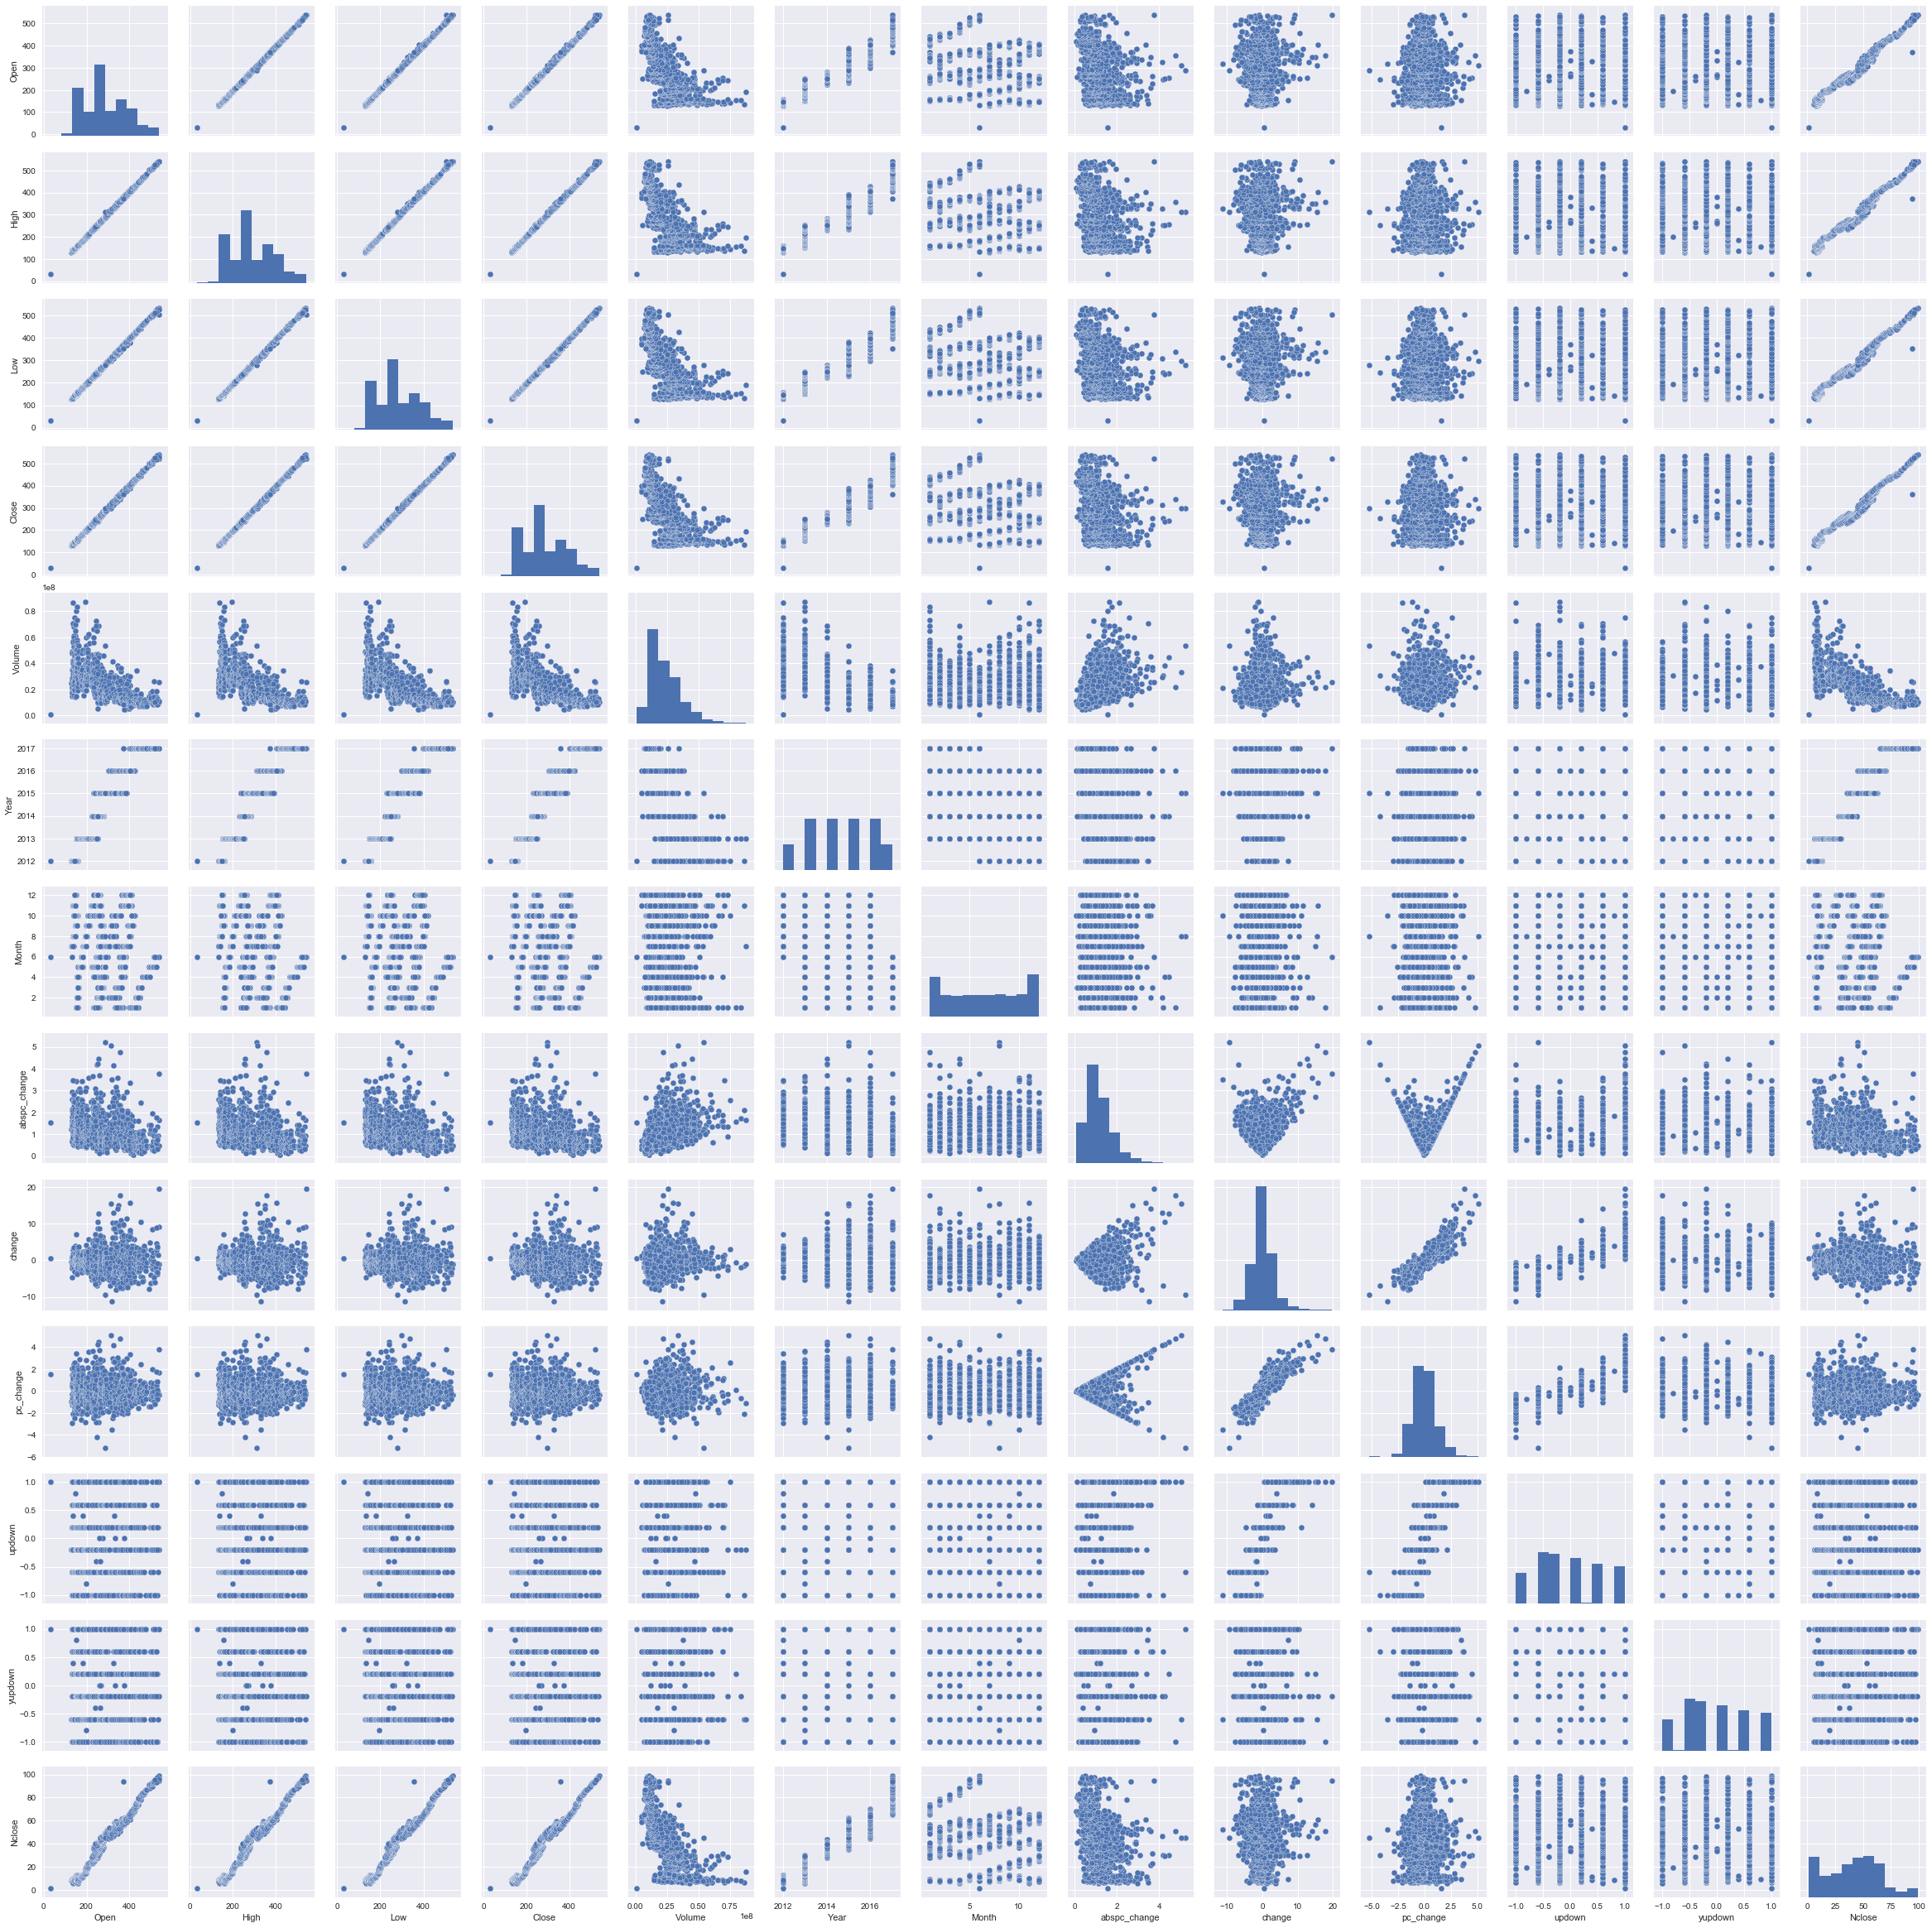

In [15]:
sb.pairplot(techs)

In [ ]:
%matplotlib inline
plt.scatter(techs['pc_change'], (techs['Volume']))

In [16]:
amzn['pc_change'].describe()

count    1257.000000
mean       -0.012844
std         1.383198
min        -5.358491
25%        -0.886807
50%        -0.002099
75%         0.760559
max         8.561460
Name: pc_change, dtype: float64

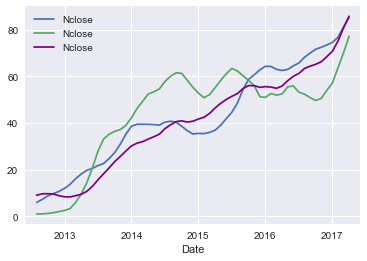

In [134]:
ax=goog[['Nclose']].resample('M').mean().rolling(window=5, center=True).mean().plot()
tesla[['Nclose']].resample('M').mean().rolling(window=5, center=True).mean().plot(ax=ax)
techs[['Nclose']].resample('M').mean().rolling(window=5, center=True).mean().plot(ax=ax, color='purple')

In [177]:
####Looking at the day before
a=aapl['Volume'].diff(periods=1) ###can i easily append this onto data?
b=goog['pc_change'].diff(periods=1)
a[0]=0
b[0]=0 # imputing no change for day 1
stats.pearsonr(goog['pc_change'], b)

(0.70563632098345452, 5.4599772920341733e-190)

In [22]:
c=ng['Volume'].diff(periods=1) ###can i easily append this onto data?
d=ng['pc_change'].diff(periods=1)
c[0]=0
d[0]=0 # imputing no change for day 1
stats.pearsonr(ng['Volume'], c)

(0.46971380748993774, 5.6011534490152275e-70)

In [24]:
stats.pearsonr(goog['Volume'], b)

(0.036772404408331655, 0.19261586905045669)

In [26]:
c=amzn['Volume'].diff(periods=1) ###can i easily append this onto data?
d=amzn['pc_change'].diff(periods=1)
e=tesla['Close'].diff(periods=1)
c[0]=0
d[0]=0
e[0]=0


In [178]:
stats.pearsonr(amzn['pc_change'], d)

(0.69755694928394263, 6.7179220096429385e-184)

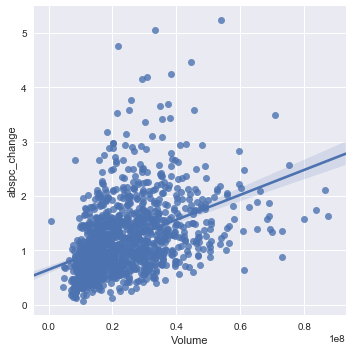

In [29]:
sb.lmplot(x="Volume", y="abspc_change", data=techs)

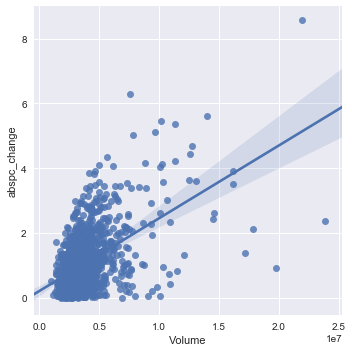

In [31]:
sb.lmplot(x="Volume", y="abspc_change", data=amzn)

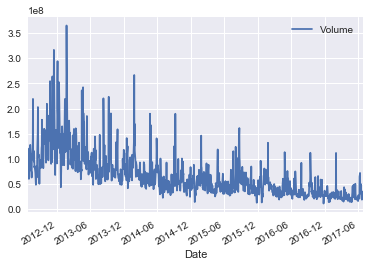

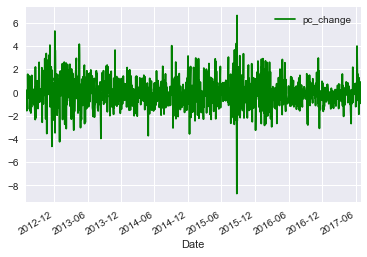

In [32]:
ax=aapl[['Volume']].plot()
aapl[['pc_change']].plot( color='green')



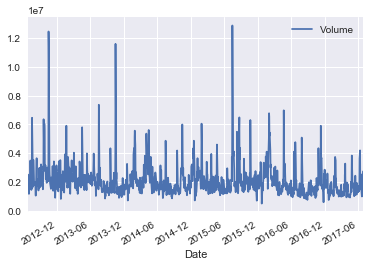

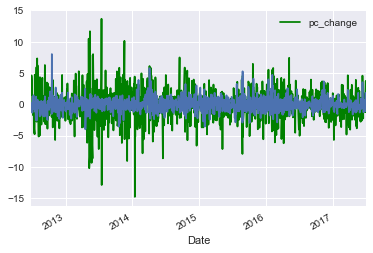

In [33]:
ax=goog[['Volume']].plot()  ###defense company 1
ax2=tesla[['pc_change']].plot( color='green')
#ng[['Volume']].plot(ax=ax)  ###defense company 2
goog['pc_change'].plot()



In [179]:
from scipy import stats
#stats.pearsonr(ng['Volume'], lll['Volume']) #.24, 2.59e-18  
stats.pearsonr(ng['pc_change'], defs['pc_change'])


(-0.045179644615681074, 0.10936985447455436)

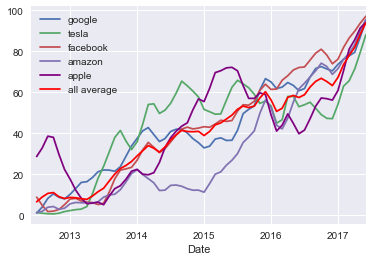

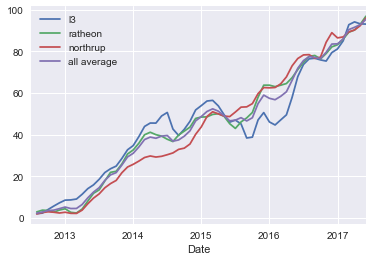

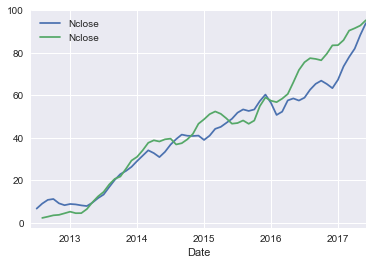

In [180]:
ax=goog[['Nclose']].resample('M').mean().rolling(window=2, center=True).mean().plot()
tesla[['Nclose']].resample('M').mean().rolling(window=2, center=True).mean().plot(ax=ax)
fbdata[['Nclose']].resample('M').mean().rolling(window=2, center=True).mean().plot(ax=ax)
amzn[['Nclose']].resample('M').mean().rolling(window=2, center=True).mean().plot(ax=ax)
aapl[['Nclose']].resample('M').mean().rolling(window=2, center=True).mean().plot(ax=ax, color='purple')
techs[['Nclose']].resample('M').mean().rolling(window=2, center=True).mean().plot(ax=ax, color='red')
ax.legend(handles=ax.lines[:6], labels=["google","tesla","facebook","amazon","apple","all average"])

ax2=lll[['Nclose']].resample('M').mean().rolling(window=2, center=True).mean().plot()
rtn[['Nclose']].resample('M').mean().rolling(window=2, center=True).mean().plot(ax=ax2, )
ng[['Nclose']].resample('M').mean().rolling(window=2, center=True).mean().plot(ax=ax2,)
defs[['Nclose']].resample('M').mean().rolling(window=2, center=True).mean().plot(ax=ax2)
ax2.legend(handles=ax.lines[:4], labels=["l3","ratheon","northrup", "all average"])

ax3=techs[['Nclose']].resample('M').mean().rolling(window=2, center=True).mean().plot()
defs[['Nclose']].resample('M').mean().rolling(window=2, center=True).mean().plot(ax=ax3)


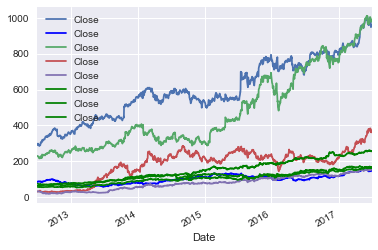

In [135]:
ax=goog[['Close']].plot()
aapl[['Close']].plot(ax=ax, color='blue')
amzn[['Close']].plot(ax=ax)
tesla[['Close']].plot(ax=ax)
fbdata[['Close']].plot(ax=ax)
lll[['Close']].plot(ax=ax, color='green')
ng[['Close']].plot(ax=ax, color='green')
rtn[['Close']].plot(ax=ax, color='green')

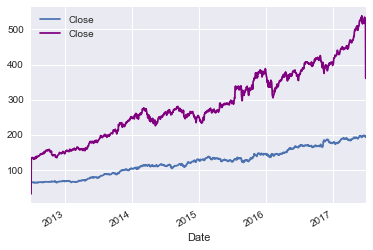

In [136]:
ax=defs[['Close']].plot()
techs[['Close']].plot(ax=ax, color='purple')

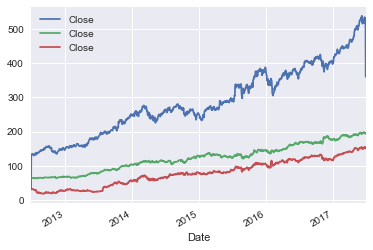

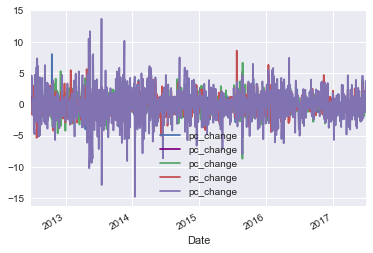

In [50]:
ax=techs[['Close']].plot()
defs[['Close']].plot(ax=ax)
fbdata[['Close']].plot(ax=ax)
#ax=fbdata[['pc_change']].plot()
ax=goog[['pc_change']].plot()
techs[['pc_change']].plot(ax=ax, color='purple')
aapl[['pc_change']].plot(ax=ax)
amzn[['pc_change']].plot(ax=ax)
tesla[['pc_change']].plot(ax=ax)
#lll[['pc_change']].plot(ax=ax, color='green')
#ng[['pc_change']].plot(ax=ax, color='green')
#rtn[['pc_change']].plot(ax=ax, color='green')

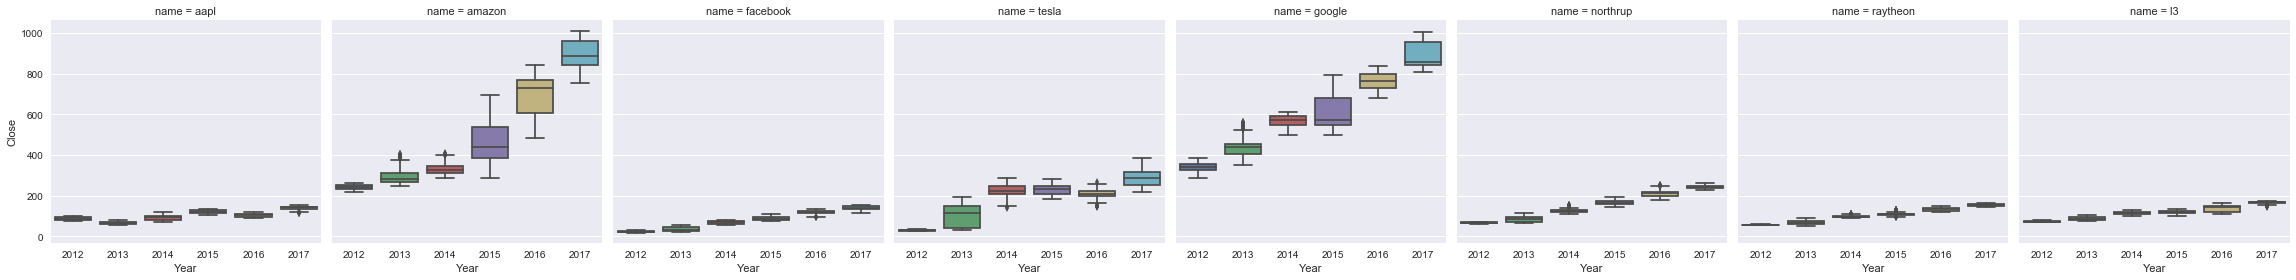

In [184]:
sb.factorplot(
    col='name',
    x='Year',
    y='Close',
    data=alldata,
    kind='box',
    
)

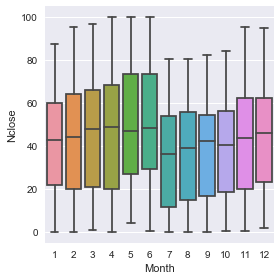

In [191]:
sb.factorplot(
    x='Month',
    y='Nclose',
    data=alldata,
    kind='box',
    
)

In [185]:
techs.corr()

,Open,High,Low,Close,Volume,Year,Month,abspc_change,change,pc_change,updown,yupdown,Nclose
Open,1.000000,0.999831,0.999681,0.999516,-0.673337,0.950607,-0.070895,-0.287498,0.020941,-0.002849,-0.023110,-0.023926,0.985465
High,0.999831,1.000000,0.999656,0.999742,-0.672200,0.951393,-0.071697,-0.282645,0.008271,-0.014501,-0.033939,-0.022874,0.985768
Low,0.999681,0.999656,1.000000,0.999803,-0.677543,0.950128,-0.070191,-0.300054,0.001465,-0.019103,-0.036700,-0.023141,0.985657
Close,0.999516,0.999742,0.999803,1.000000,-0.675693,0.950805,-0.071369,-0.293962,-0.010167,-0.030343,-0.047594,-0.022029,0.985907
Volume,-0.673337,-0.672200,-0.677543,-0.675693,1.000000,-0.693791,0.034597,0.434715,0.072106,0.063671,0.062540,0.010660,-0.707230
Year,0.950607,0.951393,0.950128,0.950805,-0.693791,1.000000,-0.284029,-0.271206,-0.001217,-0.021894,-0.036976,-0.035780,0.952684
Month,-0.070895,-0.071697,-0.070191,-0.071369,0.034597,-0.284029,1.000000,-0.014071,0.014877,0.004997,-0.009086,-0.007362,-0.069871
abspc_change,-0.287498,-0.282645,-0.300054,-0.293962,0.434715,-0.271206,-0.014071,1.000000,0.206244,0.162544,0.095223,0.038207,-0.302100
change,0.020941,0.008271,0.001465,-0.010167,0.072106,-0.001217,0.014877,0.206244,1.000000,0.883694,0.786840,-0.061099,-0.008897
pc_change,-0.002849,-0.014501,-0.019103,-0.030343,0.063671,-0.021894,0.004997,0.162544,0.883694,1.000000,0.825637,-0.072958,-0.029373


C:\Users\ewa\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  app.launch_new_instance()


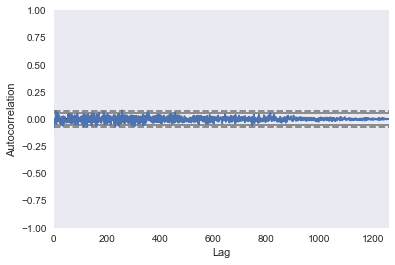

In [53]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(techs['pc_change'])

In [55]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [56]:
n = len(techs.Close)

#train = techs.Close[:int(.75*n)]
#test = techs.Close[int(.75*n):]

In [ ]:
'''
model = sm.tsa.ARIMA(train, (1, 1, 0)).fit()

predictions = model.predict(
    '2012-06-29',
    '2016-01-29',
    dynamic=True, 
)

#print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()
model.resid.plot()

In [57]:
techs

,Open,High,Low,Close,Volume,Year,Month,abspc_change,change,pc_change,updown,yupdown,Nclose
Date,,,,,,,,,,,,,
2012-06-28,31.900,32.110,30.620,31.410,914040.0,2012.0,6.0,1.536050,0.490,1.536050,1.0,1.0,1.485938
2012-06-29,131.952,133.386,130.780,132.900,26430138.4,2012.0,6.0,2.145622,-0.948,0.723411,-0.2,0.2,8.208336
2012-07-02,133.326,133.888,131.798,133.134,23891255.8,2012.0,7.0,1.229189,0.192,0.689366,0.2,-1.0,8.383652
2012-07-03,133.186,134.436,132.588,134.246,14533453.6,2012.0,7.0,0.683251,-1.060,-0.683251,-1.0,-0.6,8.763893
2012-07-05,134.242,136.376,133.714,135.030,27483037.2,2012.0,7.0,1.060948,-0.788,-0.788006,-0.6,0.4,9.184820
2012-07-06,134.406,135.302,132.776,133.520,24371276.2,2012.0,7.0,0.559388,0.886,0.190431,0.4,-1.0,8.904531
2012-07-09,133.456,134.600,132.666,133.942,23436562.4,2012.0,7.0,0.724283,-0.486,-0.724283,-1.0,1.0,9.226435
2012-07-10,134.778,135.432,131.292,132.054,29586175.8,2012.0,7.0,1.962603,2.724,1.962603,1.0,1.0,8.751131
2012-07-11,131.406,132.200,128.994,130.616,27446285.6,2012.0,7.0,0.647946,0.790,0.647946,1.0,-0.2,8.409327


In [59]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(model.resid, lags=)

SyntaxError: invalid syntax (<ipython-input-59-c72de051fa85>, line 3)

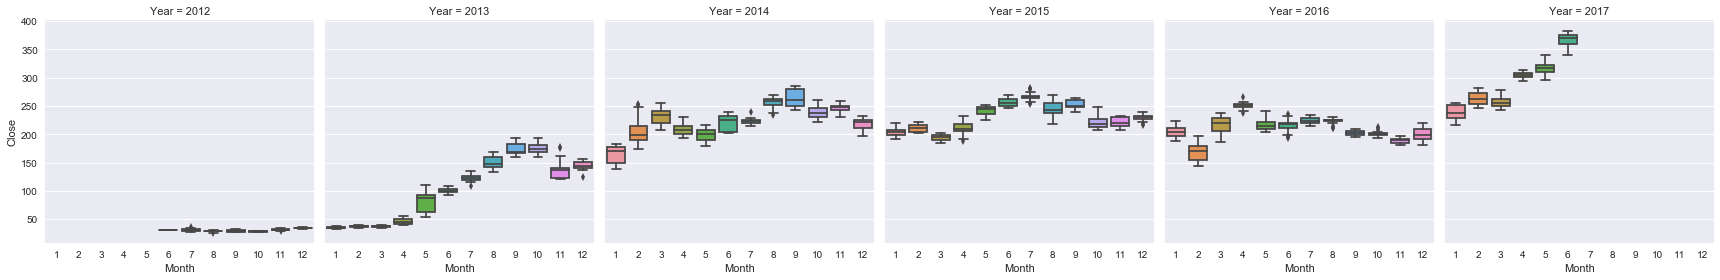

In [60]:
sb.factorplot(
    col='Year',
    x='Month',
    y='Close',
    data=tesla,
    kind='box',
    
)

In [61]:
import scipy.cluster.vq
import scipy.stats
#K = scipy.cluster.vq.kmeans(techs,5)
#VQ = scipy.cluster.vq.vq(techs, K[0])
#groups=VQ[0]

names=techs.columns.values

In [63]:
alldata=pd.concat([aapl, amzn, fbdata, tesla, goog, ng, rtn, lll])

In [138]:
td=pd.concat([techs, defs])

In [139]:

def set_colors(labels, colors='rgbykcmrgbykcmrgbykcmrgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

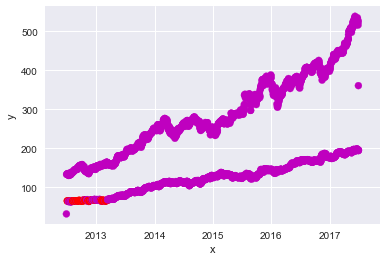

Counter({-1: 2412, 0: 104})


In [149]:
from sklearn.cluster import DBSCAN
from collections import Counter

estimator = DBSCAN(eps=.9, min_samples=30)
X = td[[ 'Close' ,'updown', 'pc_change']]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(td.index, td['Close'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
counts = Counter(labels)
print(counts)

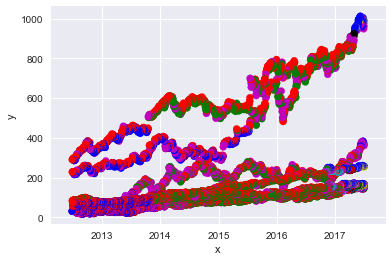

Counter({7: 4322, 8: 2631, 9: 1351, -1: 1097, 2: 242, 5: 82, 0: 76, 6: 69, 3: 59, 1: 51, 4: 43, 10: 35})


In [151]:
from sklearn.cluster import DBSCAN
from collections import Counter

estimator = DBSCAN(eps=.7, min_samples=20)
X = alldata[[ 'Nclose' ,'updown', 'pc_change']]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(alldata.index, alldata['Close'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
counts = Counter(labels)
print(counts)

In [152]:
metrics.silhouette_score(X, labels, metric='euclidean')


-0.13071161222732347

Counter({7: 4322, 8: 2631, 9: 1351, -1: 1097, 2: 242, 5: 82, 0: 76, 6: 69, 3: 59, 1: 51, 4: 43, 10: 35})


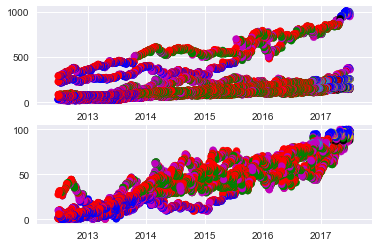

In [154]:
import pylab
#from matplotlib import colors
plt.subplot(2,1,1)
plt.scatter(alldata.index, alldata['Close'],c=colors)
plt.subplot(2,1,2)
plt.scatter(alldata.index, alldata['Nclose'],c=colors)

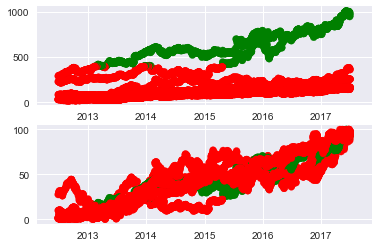

Counter({0: 8413, 1: 1645})


In [155]:
from sklearn import metrics
from sklearn.cluster import KMeans 
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = alldata[[ 'Close' ,'updown', 'pc_change']]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_

colors = set_colors(labels)
plt.subplot(2,1,1)
plt.scatter(alldata.index, alldata['Close'],c=colors)
plt.subplot(2,1,2)
plt.scatter(alldata.index, alldata['Nclose'],c=colors)

plt.show()
counts = Counter(labels)
print(counts)

In [156]:
metrics.silhouette_score(X, labels, metric='euclidean')


0.77644199627787069

In [157]:
garl=pd.concat([lll, goog, rtn, lll]) 

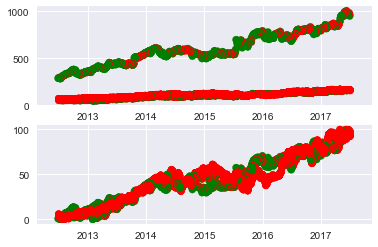

Counter({0: 3602, 1: 1426})


In [158]:
from sklearn import metrics
from sklearn.cluster import KMeans 
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = garl[[  "Volume", 'updown', 'pc_change']]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_

colors = set_colors(labels)
plt.subplot(2,1,1)
plt.scatter(garl.index, garl['Close'],c=colors)
plt.subplot(2,1,2)
plt.scatter(garl.index, garl['Nclose'],c=colors)

plt.show()
counts = Counter(labels)
print(counts)

In [159]:
 metrics.silhouette_score(X, labels, metric='euclidean')


0.60656949226149226

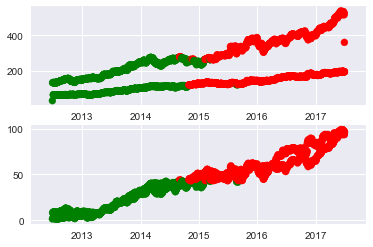

In [171]:
from sklearn import metrics
from sklearn.cluster import KMeans 
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = td[[ 'Nclose' ,'pc_change',]]
estimator.fit(X)
# Clusters are given in the labels_ attribute


colors = set_colors(labels)
plt.subplot(2,1,1)
plt.scatter(td.index, td['Close'],c=colors)
plt.subplot(2,1,2)
plt.scatter(td.index, td['Nclose'],c=colors)
labels = estimator.labels_
Counter(labels)
plt.show()

In [172]:
counts = Counter(labels)
print(counts)

Counter({0: 1285, 1: 1231})
